<a href="https://colab.research.google.com/github/Sourav15-4588/Transformer_Based_News_Title_Classification/blob/main/Machine_Learning_personal_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drive mount**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import **Libraries**

In [ ]:
!pip install keras tensorflow
!pip install keras theano
import keras
print(keras.__version__)

3.7.0


In [ ]:
!pip install --upgrade keras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np # removed extra np's
#from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from collections import Counter
import pandas as pd
import regex as rx
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Data **Load**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/My_Research/Newspaper/Title_Classification/Dataset/NewspaperDataFinalVersion - Sports (1).csv")

In [ ]:
df

,Title,Paper Name,Category,Date
0,দিনজুড়ে বোলিংয়ে হতাশা,কালের কণ্ঠ,Sports,30 October 2024
1,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা,কালের কণ্ঠ,Sports,30 October 2024
2,নিজেদের ব্যাটিংয়ে চোখ সিমন্সের,কালের কণ্ঠ,Sports,30 October 2024
3,ইস্টবেঙ্গলের কাছে বড় হার কিংসের,কালের কণ্ঠ,Sports,30 October 2024
4,মূল আলোচ্য নাজমুলের অধিনায়কত্ব,কালের কণ্ঠ,Sports,30 October 2024
...,...,...,...,...
6145,কাবরেরার ক্যাম্পে আরও ১১ জন,যুগান্তর,International,5 November 2024
6146,হলান্ডের প্রিয় খাবার কাঁচা মাছ!,যুগান্তর,International,5 November 2024
6147,কামিন্স ফিরেই জেতালেন অসিদের,যুগান্তর,International,5 November 2024
6148,পাকিস্তানও হারিয়ে দেবে ভারতকে',যুগান্তর,International,5 November 2024


In [ ]:
df.shape

(6150, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       6150 non-null   object
 1   Paper Name  6150 non-null   object
 2   Category    6150 non-null   object
 3   Date        6150 non-null   object
dtypes: object(4)
memory usage: 192.3+ KB


In [ ]:
df.describe()

,Title,Paper Name,Category,Date
count,6150,6150,6150,6150
unique,6059,6,3,124
top,ভাঙ্গায় শিক্ষাবৃত্তি ও গুণী শিক্ষককে সংবর্ধনা ...,যুগান্তর,National,23 July 2023
freq,2,1770,2089,410


# Feature **Selection**

In [ ]:
df=df.drop(['Paper Name','Date'], axis=1)
df.head()

,Title,Category
0,দিনজুড়ে বোলিংয়ে হতাশা,Sports
1,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা,Sports
2,নিজেদের ব্যাটিংয়ে চোখ সিমন্সের,Sports
3,ইস্টবেঙ্গলের কাছে বড় হার কিংসের,Sports
4,মূল আলোচ্য নাজমুলের অধিনায়কত্ব,Sports


In [ ]:
old_column_name = 'Title Category'
new_column_name = 'Category'
df.rename(columns={'Title Category': 'Category'}, inplace=True)

In [ ]:
df

,Title,Category
0,দিনজুড়ে বোলিংয়ে হতাশা,Sports
1,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা,Sports
2,নিজেদের ব্যাটিংয়ে চোখ সিমন্সের,Sports
3,ইস্টবেঙ্গলের কাছে বড় হার কিংসের,Sports
4,মূল আলোচ্য নাজমুলের অধিনায়কত্ব,Sports
...,...,...
6145,কাবরেরার ক্যাম্পে আরও ১১ জন,International
6146,হলান্ডের প্রিয় খাবার কাঁচা মাছ!,International
6147,কামিন্স ফিরেই জেতালেন অসিদের,International
6148,পাকিস্তানও হারিয়ে দেবে ভারতকে',International


In [ ]:
df.columns=["Title","Category"]

In [ ]:
df.Category.value_counts()

,count
Category,
National,2089
International,2053
Sports,2008


In [ ]:
df.isnull().sum()

,0
Title,0
Category,0


In [ ]:
df[df.isnull().any(axis=1)]

,Title,Category


# Data **Visualization**

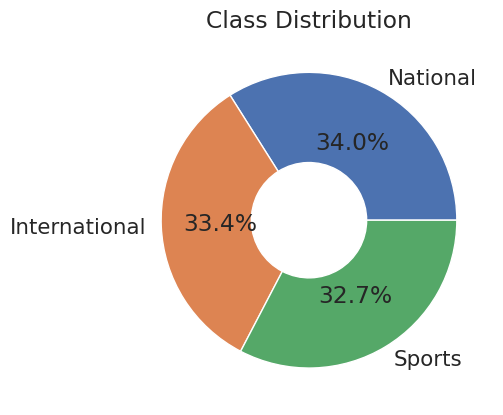

In [ ]:
class_counts = df['Category'].value_counts()
class_percents = class_counts / class_counts.sum() * 100

# Plot the donut chart
plt.pie(class_percents, labels=class_counts.index, autopct='%1.1f%%', wedgeprops={'width': 0.61})
plt.title('Class Distribution')
plt.savefig("my_plot.png")
plt.show()

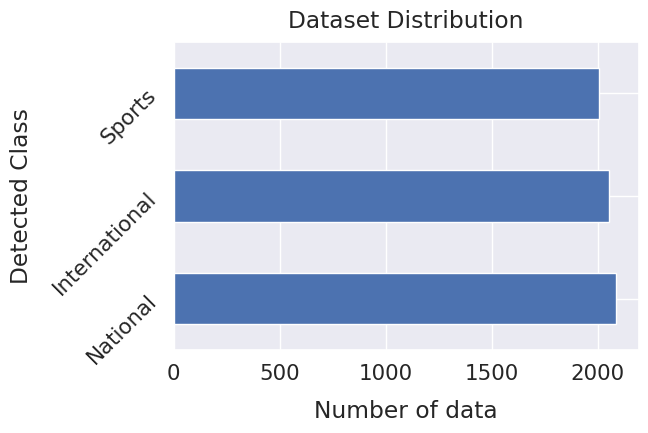

In [ ]:
sns.set(font_scale=1.4)
df['Category'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of data", labelpad=12)
plt.ylabel("Detected Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);
plt.savefig("Dataset Distribution BarChart.png")

# **Data Preperation and Preprocessing Step**

This Step Will Apply Over The Dataset
```
1. Convert Datatypes
2. Null Value Handle
3. Remove Dupliate Row
4. Remove Small Text
5. Remove Puncuatoion,Link,Emoji(No Character)
6. Remove Non bengali Character
7. Stopwords
8. Stemming
9. Sampling (Upper Samling and Downsampling)

```



**1. Convert Datatype**

In [ ]:
df['Title'] = df['Title'].astype(str)

df.to_csv('Title', index=False, encoding='utf-8')

In [ ]:
df.dtypes

,0
Title,object
Category,object


**2.Null Value Handle**

In [ ]:
df.isnull().sum()

,0
Title,0
Category,0


In [ ]:
df.dropna()

,Title,Category
0,দিনজুড়ে বোলিংয়ে হতাশা,Sports
1,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা,Sports
2,নিজেদের ব্যাটিংয়ে চোখ সিমন্সের,Sports
3,ইস্টবেঙ্গলের কাছে বড় হার কিংসের,Sports
4,মূল আলোচ্য নাজমুলের অধিনায়কত্ব,Sports
...,...,...
6145,কাবরেরার ক্যাম্পে আরও ১১ জন,International
6146,হলান্ডের প্রিয় খাবার কাঁচা মাছ!,International
6147,কামিন্স ফিরেই জেতালেন অসিদের,International
6148,পাকিস্তানও হারিয়ে দেবে ভারতকে',International


**3. Remove Dupliate Row**

Before Delete the duplicate row

In [ ]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

                                                  Title       Category
117                 কার সঙ্গে কার তুলনা-প্রশ্ন নাজমুলের         Sports
118                         আজ মেয়েদের 'ইংরেজি' পরীক্ষা         Sports
119                                   চোটে পড়েছেন হামজা         Sports
120              ক্যারিবীয়দের পাত্তাই দিল না প্রোটিয়ারা         Sports
121                        ফের ধৈর্য ধরতে বললেন টেন হাগ         Sports
...                                                 ...            ...
6055  কংগ্রেসের অভিযোগ\nধর্মীয় মেরুকরণই বিজেপির উদ্...  International
6058  মিয়ানমারে চীনা সামরিক কর্মকর্তাদের গাড়িবহরে ...  International
6084  মিয়ানমারে ২০২৫ সালে নির্বাচনের পরিকল্পনা জান্তার  International
6090             উত্তাল মণিপুরে এবার ফুঁসে উঠেছে নারীরা  International
6091            চীনের পররাষ্ট্রমন্ত্রী কিন গ্যাং নিখোঁজ  International

[90 rows x 2 columns]


In [ ]:
df.shape

(6150, 2)

In [ ]:
df.drop_duplicates(inplace=True)

After Delete the duplicate row

In [ ]:
df.shape

(6060, 2)

In [ ]:
df.Category.value_counts()

,count
Category,
National,2056
International,2015
Sports,1989


In [ ]:
df.head()

,Title,Category
0,দিনজুড়ে বোলিংয়ে হতাশা,Sports
1,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা,Sports
2,নিজেদের ব্যাটিংয়ে চোখ সিমন্সের,Sports
3,ইস্টবেঙ্গলের কাছে বড় হার কিংসের,Sports
4,মূল আলোচ্য নাজমুলের অধিনায়কত্ব,Sports


**4. Remove Non-Character word**

In [ ]:
def remove_non_bengali_characters(Title):
    cleaned = re.sub(r'[^\u0980-\u09FF\s]+', ' ', Title)
    return cleaned.strip()

# Assuming df is your DataFrame and 'Title' is a column containing text data
df['Title'] = df['Title'].apply(remove_non_bengali_characters)

In [ ]:
df.head()

,Title,Category
0,দিনজুড়ে বোলিংয়ে হতাশা,Sports
1,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা,Sports
2,নিজেদের ব্যাটিংয়ে চোখ সিমন্সের,Sports
3,ইস্টবেঙ্গলের কাছে বড় হার কিংসের,Sports
4,মূল আলোচ্য নাজমুলের অধিনায়কত্ব,Sports


**5. Remove Non-Bengali Character**

In [ ]:
# Define a regular expression pattern to match Bengali characters and spaces
bengali_pattern = re.compile("[\u0980-\u09FF ]+")

# Function to remove non-Bengali characters from a string
def remove_non_bengali_chars(text):
    return "".join(filter(bengali_pattern.match, text))

# Apply the function to each element in your dataset
df['New_Title'] = df['Title'].apply(remove_non_bengali_chars)

In [ ]:
df.head(30)

,Title,Category,New_Title
0,দিনজুড়ে বোলিংয়ে হতাশা,Sports,দিনজুড়ে বোলিংয়ে হতাশা
1,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা,Sports,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা
2,নিজেদের ব্যাটিংয়ে চোখ সিমন্সের,Sports,নিজেদের ব্যাটিংয়ে চোখ সিমন্সের
3,ইস্টবেঙ্গলের কাছে বড় হার কিংসের,Sports,ইস্টবেঙ্গলের কাছে বড় হার কিংসের
4,মূল আলোচ্য নাজমুলের অধিনায়কত্ব,Sports,মূল আলোচ্য নাজমুলের অধিনায়কত্ব
5,দুটি ম্যাচই নিষ্প্রাণ ড্র,Sports,দুটি ম্যাচই নিষ্প্রাণ ড্র
6,রদ্রির মর্যাদার রাতে হতাশ ভিনিসিয়ুস,Sports,রদ্রির মর্যাদার রাতে হতাশ ভিনিসিয়ুস
7,ছাদখোলা বাসের কথা মনে করিয়ে দিয়েছেন সানজিদা,Sports,ছাদখোলা বাসের কথা মনে করিয়ে দিয়েছেন সানজিদা
8,পাকিস্তান টেস্টের কথা মনে করালেন সিমন্স,Sports,পাকিস্তান টেস্টের কথা মনে করালেন সিমন্স
9,রদ্রির ব্যালন ডি অর নিয়ে আলোচনা সমালোচনা,Sports,রদ্রির ব্যালন ডি অর নিয়ে আলোচনা সমালোচনা


**6. Remove Stopwords**

In [ ]:
def process_conversations(Conversation):
    stp = open('/content/drive/MyDrive/My_Research/Newspaper/Title_Classification/Dataset/stopwords-bn.txt','r',encoding="utf8").read().split()
    result = Conversation.split()
    Conversation = [word.strip() for word in result if word not in stp ]
    Conversation =" ".join(Conversation)
    Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
    return Conversation

In [ ]:
df['cleaned'] = df['New_Title'].apply(process_conversations)
sample_data = [10,400]
for i in sample_data:
     print('Original:\n',df.New_Title[i],'\nCleaned:\n',
           df.cleaned[i],'\n','Detected as:-- ',df.Category[i],'\n')

Original:
 জর্জি স্টাবসের স্পিন খেলার মন্ত্র 
Cleaned:
 জর্জি স্টাবসের স্পিন খেলার মন্ত্র 
 Detected as:--  Sports 

Original:
 সৌদি আরবে বিশ্বকাপ হলে খুশি হবেন নেইমার 
Cleaned:
 সৌদি আরবে বিশ্বকাপ খুশি নেইমার 
 Detected as:--  Sports 



In [ ]:
df

,Title,Category,New_Title,cleaned
0,দিনজুড়ে বোলিংয়ে হতাশা,Sports,দিনজুড়ে বোলিংয়ে হতাশা,দিনজুড়ে বোলিংয়ে হতাশা
1,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা,Sports,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা
2,নিজেদের ব্যাটিংয়ে চোখ সিমন্সের,Sports,নিজেদের ব্যাটিংয়ে চোখ সিমন্সের,ব্যাটিংয়ে চোখ সিমন্সের
3,ইস্টবেঙ্গলের কাছে বড় হার কিংসের,Sports,ইস্টবেঙ্গলের কাছে বড় হার কিংসের,ইস্টবেঙ্গলের বড় হার কিংসের
4,মূল আলোচ্য নাজমুলের অধিনায়কত্ব,Sports,মূল আলোচ্য নাজমুলের অধিনায়কত্ব,মূল আলোচ্য নাজমুলের অধিনায়কত্ব
...,...,...,...,...
6145,কাবরেরার ক্যাম্পে আরও ১১ জন,International,কাবরেরার ক্যাম্পে আরও ১১ জন,কাবরেরার ক্যাম্পে ১১
6146,হলান্ডের প্রিয় খাবার কাঁচা মাছ,International,হলান্ডের প্রিয় খাবার কাঁচা মাছ,হলান্ডের প্রিয় খাবার কাঁচা মাছ
6147,কামিন্স ফিরেই জেতালেন অসিদের,International,কামিন্স ফিরেই জেতালেন অসিদের,কামিন্স ফিরেই জেতালেন অসিদের
6148,পাকিস্তানও হারিয়ে দেবে ভারতকে,International,পাকিস্তানও হারিয়ে দেবে ভারতকে,পাকিস্তানও হারিয়ে দেবে ভারতকে


In [ ]:
df.drop(["Title","New_Title"],axis=1,inplace=True)

In [ ]:
df

,Category,cleaned
0,Sports,দিনজুড়ে বোলিংয়ে হতাশা
1,Sports,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা
2,Sports,ব্যাটিংয়ে চোখ সিমন্সের
3,Sports,ইস্টবেঙ্গলের বড় হার কিংসের
4,Sports,মূল আলোচ্য নাজমুলের অধিনায়কত্ব
...,...,...
6145,International,কাবরেরার ক্যাম্পে ১১
6146,International,হলান্ডের প্রিয় খাবার কাঁচা মাছ
6147,International,কামিন্স ফিরেই জেতালেন অসিদের
6148,International,পাকিস্তানও হারিয়ে দেবে ভারতকে


In [ ]:
df.columns=["Category","Title"]

In [ ]:
df.head(10)

,Category,Title
0,Sports,দিনজুড়ে বোলিংয়ে হতাশা
1,Sports,আবারও ছাদখোলা বাসে উৎসবের প্রতিজ্ঞা
2,Sports,ব্যাটিংয়ে চোখ সিমন্সের
3,Sports,ইস্টবেঙ্গলের বড় হার কিংসের
4,Sports,মূল আলোচ্য নাজমুলের অধিনায়কত্ব
5,Sports,ম্যাচই নিষ্প্রাণ ড্র
6,Sports,রদ্রির মর্যাদার রাতে হতাশ ভিনিসিয়ুস
7,Sports,ছাদখোলা বাসের কথা করিয়ে দিয়েছেন সানজিদা
8,Sports,পাকিস্তান টেস্টের কথা করালেন সিমন্স
9,Sports,রদ্রির ব্যালন ডি অর আলোচনা সমালোচনা


**7. Remove Small Text**

In [ ]:
df['no_char'] = df['Title'].apply(lambda Title: len(Title))

In [ ]:
df['length'] = df['Title'].apply(lambda x:len(x.split()))

In [ ]:
df = df.sort_values(by='length', ascending=False)

In [ ]:
df.head(100)

,Category,Title,no_char,length
2153,National,পল্লী বিদ্যুতে অস্থিরতাবিদ্যুত্ সরবরাহ বন্ধের ...,410,53
5686,International,পুতিন কিম বৈঠকের ক্ষেপণাস্ত্র ছুড়ল উ কোরিয়াদক্...,223,32
4902,Sports,ছুটিতে যাওয়ার দাবিদাওয়া জানিয়ে গেছেন সাবিনারাব...,211,30
6014,International,খমুতে রুশ ব্রিগেডের বিরুদ্ধে সাফল্যের দাবি ইউক...,231,29
4452,International,তাইওয়ানের মহড়া ঘিরে ডজন যুদ্ধবিমান পাঠালো চী...,179,25
...,...,...,...,...
4759,National,শাহজালালে ২৫ কেজি স্বর্ণ উদ্ধার বিভাগীয় মামলা...,73,11
2462,National,বরিশাল সিটি করপোরেশন শিক্ষার্থী পরিচয়ে হয়রানির...,83,11
1569,International,দক্ষিণ আফ্রিকার কেপ টাউনে ট্যাক্সি ধর্মঘট বিক্...,75,11
2107,National,পরিকল্পনা উপদেষ্টা দুর্নীতি কিছুটা কমলেও চাঁদা...,80,11


In [ ]:
dataset = df.loc[df.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

After Cleaning: 
Removed 240 Small conversations 
Total conversations: 5820


In [ ]:
newdf = dataset.loc[dataset['length'] <= 50]
newdf = newdf.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Big conversations".format(len(dataset)-len(newdf)),
      "\nTotal conversations:",len(newdf))

After Cleaning: 
Removed 1 Big conversations 
Total conversations: 5819


In [ ]:
newdf.shape

(5819, 4)

In [ ]:
newdf.head()

,Category,Title,no_char,length
0,International,পুতিন কিম বৈঠকের ক্ষেপণাস্ত্র ছুড়ল উ কোরিয়াদক্...,223,32
1,Sports,ছুটিতে যাওয়ার দাবিদাওয়া জানিয়ে গেছেন সাবিনারাব...,211,30
2,International,খমুতে রুশ ব্রিগেডের বিরুদ্ধে সাফল্যের দাবি ইউক...,231,29
3,International,তাইওয়ানের মহড়া ঘিরে ডজন যুদ্ধবিমান পাঠালো চী...,179,25
4,International,মেক্সিকোয় কাভার্ড ভ্যান ১৪৮ অভিবাসনপ্রত্যাশী ...,179,21


In [ ]:
newdf.drop(["no_char","length"],axis=1,inplace=True)

# **Stemming**

In [ ]:
!pip install bangla-stemmer

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

newdf['Title']=newdf['Title'].apply(stemming)
newdf.head()

,Category,Title
0,International,পুতিন কিম বৈঠকের ক্ষেপণাস্ত্র ছুড়ল উ কোরিয়াদক্...
1,Sports,ছুটিতে যাওয়ার দাবিদাওয়া জানিয়ে গেছেন সাবিনারাব...
2,International,খমুতে রুশ ব্রিগেডের বিরুদ্ধে সাফল্যের দাবি ইউক...
3,International,তাইওয়ানের মহড়া ঘিরে ডজন যুদ্ধবিমান পাঠালো চী...
4,International,মেক্সিকোয় কাভার্ড ভ্যান ১৪৮ অভিবাসনপ্রত্যাশী ...


In [ ]:
newdf.Category.value_counts()

,count
Category,
National,2030
International,1999
Sports,1790


In [ ]:
df.Category.value_counts()

,count
Category,
National,2056
International,2015
Sports,1989


In [ ]:
newdf.shape

(5819, 2)

In [ ]:
df.shape

(6060, 4)

# **Token Adding**

In [ ]:
newdf.to_csv('train.csv', index=False)

In [ ]:
import nltk

In [ ]:
import csv
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Download the NLTK tokenizer data if you haven't already

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

remove numbers

In [ ]:
def remove_bangla_numbers(tokens):
    # Regular expression to match Bengali digits
    bengali_digit_pattern = re.compile("[০-৯]+")
    return [token for token in tokens if not bengali_digit_pattern.search(token)]

In [ ]:
import nltk
import csv
from nltk.tokenize import word_tokenize
!pip install nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download punkt_tab

def remove_bangla_numbers(tokens):
    import re # Importing re inside the function
    # Regular expression to match Bengali digits
    bengali_digit_pattern = re.compile("[০-৯]+")
    return [token for token in tokens if not bengali_digit_pattern.search(token)]

with open('/content/train.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    for row in csv_reader:
        text = row['Title']  # Assuming 'text' is the name of the column you want to tokenize
        tokens = word_tokenize(text)
        tokens = remove_bangla_numbers(tokens)
        print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Streaming output truncated to the last 5000 lines.
['গাইবান্ধায়', 'চান্দু', 'হত্যা', 'ঘুস', 'দেওয়ায়', 'মামলা', 'নেয়নি', 'পুলিশ']
['অপরের', 'কথা', 'শুনছেন', 'যুক্তরাষ্ট্র', 'চীন', 'সম্পর্ক', 'বাড়ানোর', 'উদ্যোগ']
['বাঘের', 'চেয়েও', 'শত', 'শত', 'গুণ', 'ভয়ংকর', 'মানুষ']
['হোসেনপুরে', 'ভাইবোন', 'হত্যা', 'আসামিদের', 'ফাঁসির', 'দাবিতে', 'মানববন্ধন']
['নিরীহ', 'আফগানদের', 'হত্যা', 'প্রিন্স', 'হ্যারি', 'অভিযোগ', 'তালেবানের']
['চট্টগ্রামে', 'হতাশার', 'দিনে', 'আশার', 'আলো', 'হূদয়ের', 'ব্যাটে']
['জো', 'বাইডেন', 'কংগ্রেস', 'ভবনে', 'দাঙ্গার', 'নিন্দায়', 'বাইডেন']
['এক', 'জুতোর', 'ফিতা', 'বেঁধেই', 'লাখ']
['নাসিরের', 'অলরাউন্ড', 'নৈপুণ্য', 'ঢাকার', 'অভিযান', 'জয়', 'দিয়ে']
['চট্টগ্রাম', 'বন্দরকে', 'বিদেশিদের', 'হাতে', 'দেওয়ার', 'তোড়জোড়', 'আবারও']
['জুনিয়র', 'এশিয়া', 'কাপ', 'হকির', 'চূুড়ান্ত', 'পর্বে', 'বাংলাদেশ']
['বিশ্ব', 'চ্যাম্পিয়ন', 'আর্জেন্টিনার', 'খেলা', 'মার্চে', 'জামালদের', 'খেলা']
['পূর্বাচলের', 'অভ্যন্তরীণ', 'সড়ক', 'বেহাল', 'হেঁটে', 'চলাও', 'দায়']
['জোড়া', 'গোলে', 'রিয়ালকে', 'জয়', 

In [ ]:
from collections import Counter

# Create a Counter to count token frequencies
token_counts = Counter()

with open('/content/train.csv', 'r') as csv_file:
    csv_reader = csv.DictReader(csv_file)

    for row in csv_reader:
        text = row['Title']
        tokens = word_tokenize(text)
        token_counts.update(tokens)

# Print the most common tokens and their frequencies
most_common_tokens = token_counts.most_common(10)  # Change 10 to the desired number of tokens to display
print(most_common_tokens)

[('নিহত', 186), ('মৃত্যু', 124), ('বাংলাদেশ', 97), ('দাবি', 92), ('ভারত', 88), ('তিন', 87), ('এক', 84), ('বিরুদ্ধে', 83), ('হত্যা', 81), ('বছর', 79)]


In [ ]:
newdf=pd.read_csv("/content/train.csv")

In [ ]:
newdf

,Category,Title
0,International,পুতিন কিম বৈঠকের ক্ষেপণাস্ত্র ছুড়ল উ কোরিয়াদক্...
1,Sports,ছুটিতে যাওয়ার দাবিদাওয়া জানিয়ে গেছেন সাবিনারাব...
2,International,খমুতে রুশ ব্রিগেডের বিরুদ্ধে সাফল্যের দাবি ইউক...
3,International,তাইওয়ানের মহড়া ঘিরে ডজন যুদ্ধবিমান পাঠালো চী...
4,International,মেক্সিকোয় কাভার্ড ভ্যান ১৪৮ অভিবাসনপ্রত্যাশী ...
...,...,...
5814,Sports,ঘুম ভাঙছে বাফুফের
5815,Sports,মেসির জোড়া গোল
5816,Sports,এমবাপ্পের রিয়ালের অপেক্ষা
5817,Sports,ফিরমিনো সৌদি ক্লাবে


**Label Encodeing**

In [ ]:
def label_encoding(Category,bool):

    le = LabelEncoder()
    le.fit(Category)
    encoded_labels = le.transform(Category)
    labels = np.array(encoded_labels)
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(Category[i],' ', encoded_labels[i],'\n')

    return labels

In [ ]:
def dataset_split(feature_space, Category):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(feature_space, Category,
                                                        train_size=0.8,
                                                        test_size=0.2,
                                                        random_state=0)

    # Print feature size and dataset distribution
    print("Feature Size :======>", X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name", "\t\tSize")
    print("\t========\t\t======")
    print("\tFull\t\t\t", feature_space.shape[0],
          "\n\tTraining\t\t", X_train.shape[0],
          "\n\tTest\t\t\t", X_test.shape[0])

    # Return the split dataset
    return X_train, X_test, y_train, y_test

# **Apply TfidfVectorizer**

In [ ]:
def calc_gram_tfidf(Conversations):
    # Initialize TF-IDF vectorizer
    tfidf = TfidfVectorizer(ngram_range=(1, 3), use_idf=True, tokenizer=lambda x: x.split())

    # Fit TF-IDF vectorizer and transform conversations into TF-IDF features
    X = tfidf.fit_transform(Conversations)

    # Return TF-IDF vectorizer and transformed features
    return tfidf, X

# **Apply Models**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
def ml_models_defination():

    lr_model = LogisticRegression()
    dt_model = DecisionTreeClassifier()
    rf_model = RandomForestClassifier()
    mnb_model = MultinomialNB(alpha=0.12)
    knn_model = KNeighborsClassifier(n_neighbors=3)
    svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
    ada_model = AdaBoostClassifier(random_state=42),
    #SGDClassifier(loss='log_loss', random_state=42),
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Multi. Naive Bayes','KNN','SVM','AdaBoost']

    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,svm_model,ada_model]

    return ml_models,model_names

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_performance(model, X_train, X_test, y_train, y_test):
    my_dict = {}
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    # Accuracy
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y), 4) * 100

    # Precision, Recall, and F1 Score
    average = 'weighted'  # Choose appropriate average strategy for multi-class
    my_dict['Precision'] = round(precision_score(y_test, pred_y, average=average), 4) * 100
    my_dict['Recall'] = round(recall_score(y_test, pred_y, average=average), 4) * 100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, average=average), 4) * 100

    return my_dict

In [ ]:
def performance_table(performance_dict):
    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    model_names = []

    for model_name, metrics in performance_dict.items():
        model_names.append(model_name)
        acc_list.append(metrics['Accuracy'])
        pr_list.append(metrics['Precision'])
        re_list.append(metrics['Recall'])
        f1_list.append(metrics['F1 Score'])

    # Create DataFrame with dynamic model names
    performance_df = pd.DataFrame({
        'Model Name': model_names,
        'Accuracy': acc_list,
        'Precision': pr_list,
        'Recall': re_list,
        'F1 Score': f1_list
    })
    return performance_df

In [ ]:
newdf.head()

,Category,Title
0,International,পুতিন কিম বৈঠকের ক্ষেপণাস্ত্র ছুড়ল উ কোরিয়াদক্...
1,Sports,ছুটিতে যাওয়ার দাবিদাওয়া জানিয়ে গেছেন সাবিনারাব...
2,International,খমুতে রুশ ব্রিগেডের বিরুদ্ধে সাফল্যের দাবি ইউক...
3,International,তাইওয়ানের মহড়া ঘিরে ডজন যুদ্ধবিমান পাঠালো চী...
4,International,মেক্সিকোয় কাভার্ড ভ্যান ১৪৮ অভিবাসনপ্রত্যাশী ...


In [ ]:
# Unigram

x = ["ভারত মহাসাগরে জলদস্যুদের কবলে বাংলাদেশি জাহাজ"]

def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

get_top_n_words(x,3)

[('রত', 1), ('মহ', 1), ('গর', 1)]

In [ ]:
# Bigram

y = ["ভারত মহাসাগরে জলদস্যুদের কবলে বাংলাদেশি জাহাজ"]
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(y,3)

[('রত মহ', 1), ('মহ গর', 1), ('গর জলদস', 1)]

In [ ]:
# Tigram

z = ["ভারত মহাসাগরে জলদস্যুদের কবলে বাংলাদেশি জাহাজ"]
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(z,3)

[('রত মহ গর', 1), ('মহ গর জলদস', 1), ('গর জলদস কবল', 1)]

In [ ]:
# Define the 'ngrams' variable before the loop
ngrams = [(1, 1), (2, 2), (3, 3)]  # Assuming you want unigrams, bigrams, and trigrams
gram_names = ['unigram', 'bigram', 'trigram'] # Define corresponding names for the ngrams

In [ ]:
for i, gram in enumerate(ngrams):
     tfidf, feature = calc_gram_tfidf(newdf.Title)
     labels = label_encoding(newdf.Category, False)
     X_train, X_test, y_train, y_test = dataset_split(feature, labels)
     ml_models, model_names = ml_models_defination()

     # Debugging outputs
     print(f"ml_models contents: {ml_models}")
     print(f"ml_models types: {[type(model) for model in ml_models]}")

     accuracy = {f'{model_names[j]}': model_performance(model, X_train, X_test, y_train, y_test)
                 for j, model in enumerate(ml_models) if isinstance(model, (LogisticRegression, DecisionTreeClassifier,
                                                                           RandomForestClassifier, MultinomialNB,
                                                                           KNeighborsClassifier, SVC))}

     with open(f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy, f)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Feature Size :======> 55651

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 5819 
	Training		 4655 
	Test			 1164
ml_models contents: [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), MultinomialNB(alpha=0.12), KNeighborsClassifier(n_neighbors=3), SVC(C=1.01, degree=1, gamma='auto', kernel='linear'), (AdaBoostClassifier(random_state=42),)]
ml_models types: [<class 'sklearn.linear_model._logistic.LogisticRegression'>, <class 'sklearn.tree._classes.DecisionTreeClassifier'>, <class 'sklearn.ensemble._forest.RandomForestClassifier'>, <class 'sklearn.naive_bayes.MultinomialNB'>, <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, <class 'sklearn.svm._classes.SVC'>, <class 'tuple'>]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Feature Size :======> 55651

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 5819 
	Training		 4655 
	Test			 1164
ml_models contents: [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), MultinomialNB(alpha=0.12), KNeighborsClassifier(n_neighbors=3), SVC(C=1.01, degree=1, gamma='auto', kernel='linear'), (AdaBoostClassifier(random_state=42),)]
ml_models types: [<class 'sklearn.linear_model._logistic.LogisticRegression'>, <class 'sklearn.tree._classes.DecisionTreeClassifier'>, <class 'sklearn.ensemble._forest.RandomForestClassifier'>, <class 'sklearn.naive_bayes.MultinomialNB'>, <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, <class 'sklearn.svm._classes.SVC'>, <class 'tuple'>]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



Feature Size :======> 55651

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 5819 
	Training		 4655 
	Test			 1164
ml_models contents: [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), MultinomialNB(alpha=0.12), KNeighborsClassifier(n_neighbors=3), SVC(C=1.01, degree=1, gamma='auto', kernel='linear'), (AdaBoostClassifier(random_state=42),)]
ml_models types: [<class 'sklearn.linear_model._logistic.LogisticRegression'>, <class 'sklearn.tree._classes.DecisionTreeClassifier'>, <class 'sklearn.ensemble._forest.RandomForestClassifier'>, <class 'sklearn.naive_bayes.MultinomialNB'>, <class 'sklearn.neighbors._classification.KNeighborsClassifier'>, <class 'sklearn.svm._classes.SVC'>, <class 'tuple'>]


In [ ]:
table = performance_table(accuracy)
df3 =pd.DataFrame(table)
df3

,Model Name,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,81.36,82.26,81.36,81.43
1,Decision Tree,72.85,75.08,72.85,73.05
2,Random Forest,72.85,79.66,72.85,73.04
3,Multi. Naive Bayes,85.22,85.78,85.22,85.16
4,KNN,76.55,77.22,76.55,76.43
5,SVM,84.71,84.98,84.71,84.76


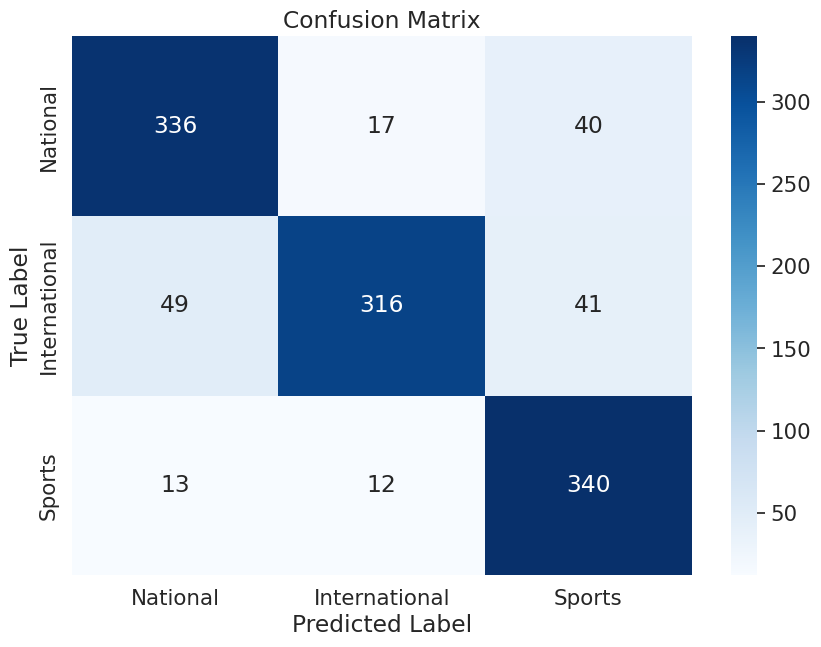

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define label mapping
label_mapping = {'National': 0, 'International': 1, 'Sports': 2}

# ... (code to apply this mapping to your dataset - e.g., using map or replace) ...

# Assuming you have already trained the Multinomial Naive Bayes model (mnb_model)
# and have X_test and y_test

# Get the Multinomial Naive Bayes model
ml_models, model_names = ml_models_defination()  # Define models and their names
mnb_model = ml_models[model_names.index('Multi. Naive Bayes')] # Get the model using its name

# Fit the model before making predictions
mnb_model.fit(X_train, y_train)

# Continue with the confusion matrix generation
# Predict the labels for the test data
y_pred = mnb_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with updated labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(label_mapping.keys()),  # Use label mapping for x-axis
            yticklabels=list(label_mapping.keys())) # Use label mapping for y-axis
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()